In [ ]:
'''
v1. Predict Apple using Multi-linear regression with [tnote, tbill, Fed_rate, GDP, GDP_growth, CPI]

'''

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta
from seaborn import set_style

In [3]:
set_style("whitegrid")

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load data

In [4]:
pwd

'/Users/ziyuan/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/Machine_Learning/Erdos_Bootcamp/Project/modeling/modeling'

In [5]:
apple_raw=pd.read_csv('../../Dataset/AAPL.csv')

In [6]:
apple_raw["Date"] = pd.to_datetime(apple_raw["Date"])

In [7]:
apple_raw=apple_raw.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [8]:
apple_raw

,Date,Close
0,2010-11-26,11.250000
1,2010-11-29,11.316786
2,2010-11-30,11.112500
3,2010-12-01,11.300000
4,2010-12-02,11.362500
...,...,...
3016,2022-11-18,151.289993
3017,2022-11-21,148.009995
3018,2022-11-22,150.179993
3019,2022-11-23,151.070007


In [13]:
apple_macro=pd.read_csv('../../Dataset/apple_macro.csv')
apple_macro.head(3)

,Unnamed: 0,Date,Close,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
0,0,2010-11-26,11.250000,2.87,0.28,0.2,15309.471,2.708857,219.59
1,1,2010-11-29,11.316786,2.84,0.28,0.2,15309.471,2.708857,219.59
2,2,2010-11-30,11.112500,2.81,0.27,0.2,15309.471,2.708857,219.59


In [14]:
apple_macro=apple_macro.drop(columns=['Unnamed: 0'])
apple_macro["Date"] = pd.to_datetime(apple_macro["Date"])

In [9]:
apple_fin=pd.read_csv('../../Dataset/apple_fin.csv')
apple_fin.head(3)

,Unnamed: 0,Date,Close,Gross_Profit,ROE
0,0,2010-11-26,11.250000,7512,0.34
1,1,2010-11-29,11.316786,7512,0.34
2,2,2010-11-30,11.112500,7512,0.34


In [10]:
apple_fin=apple_fin.drop(columns=['Unnamed: 0'])
apple_fin["Date"] = pd.to_datetime(apple_fin["Date"])

In [15]:
apple_macro

,Date,Close,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
0,2010-11-26,11.250000,2.87,0.28,0.20,15309.471,2.708857,219.590
1,2010-11-29,11.316786,2.84,0.28,0.20,15309.471,2.708857,219.590
2,2010-11-30,11.112500,2.81,0.27,0.20,15309.471,2.708857,219.590
3,2010-12-01,11.300000,2.97,0.28,0.20,15309.471,2.708857,220.472
4,2010-12-02,11.362500,3.01,0.29,0.19,15309.471,2.708857,220.472
...,...,...,...,...,...,...,...,...
3016,2022-11-18,151.289993,3.82,4.74,3.83,25663.289,1.800000,298.062
3017,2022-11-21,148.009995,3.83,4.75,3.83,25663.289,1.800000,298.062
3018,2022-11-22,150.179993,3.76,4.79,3.83,25663.289,1.800000,298.062
3019,2022-11-23,151.070007,3.71,4.75,3.83,25663.289,1.800000,298.062


In [16]:
apple_fin

,Date,Close,Gross_Profit,ROE
0,2010-11-26,11.250000,7512,0.34
1,2010-11-29,11.316786,7512,0.34
2,2010-11-30,11.112500,7512,0.34
3,2010-12-01,11.300000,7512,0.34
4,2010-12-02,11.362500,7512,0.34
...,...,...,...,...
3016,2022-11-18,151.289993,38095,1.61
3017,2022-11-21,148.009995,38095,1.61
3018,2022-11-22,150.179993,38095,1.61
3019,2022-11-23,151.070007,38095,1.61


In [18]:
apple_merge = pd.merge_asof(apple_macro, apple_fin.drop(columns=['Close']), on='Date')
apple_merge

,Date,Close,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI,Gross_Profit,ROE
0,2010-11-26,11.250000,2.87,0.28,0.20,15309.471,2.708857,219.590,7512,0.34
1,2010-11-29,11.316786,2.84,0.28,0.20,15309.471,2.708857,219.590,7512,0.34
2,2010-11-30,11.112500,2.81,0.27,0.20,15309.471,2.708857,219.590,7512,0.34
3,2010-12-01,11.300000,2.97,0.28,0.20,15309.471,2.708857,220.472,7512,0.34
4,2010-12-02,11.362500,3.01,0.29,0.19,15309.471,2.708857,220.472,7512,0.34
...,...,...,...,...,...,...,...,...,...,...
3016,2022-11-18,151.289993,3.82,4.74,3.83,25663.289,1.800000,298.062,38095,1.61
3017,2022-11-21,148.009995,3.83,4.75,3.83,25663.289,1.800000,298.062,38095,1.61
3018,2022-11-22,150.179993,3.76,4.79,3.83,25663.289,1.800000,298.062,38095,1.61
3019,2022-11-23,151.070007,3.71,4.75,3.83,25663.289,1.800000,298.062,38095,1.61


In [19]:
apple_train = apple_merge.iloc[:-500].copy()
apple_test = apple_merge.iloc[-500:].copy()

In [20]:
[apple_train.shape, apple_test.shape, len(apple_merge)]

[(2521, 10), (500, 10), 3021]

In [21]:
model_features = ['CPI','ROE']

In [23]:
reg = LinearRegression(copy_X = True)
    
reg.fit(apple_train[model_features].values,
        apple_train.Close.values)
    
pred = reg.predict(apple_test[model_features].values)
    
mses = mean_squared_error(apple_test.Close.values, pred)

In [27]:
reg.coef_

array([  1.13980923, 111.46732787])

In [24]:
mses

2264.837358698339

In [25]:
pred

array([ 95.93274066,  95.93274066,  95.93274066,  95.93274066,
        95.93274066,  95.93274066,  95.93274066,  95.93274066,
        95.93274066,  95.93274066,  95.93274066,  95.93274066,
        95.93274066,  95.93274066,  95.93274066,  95.93274066,
        95.93274066,  95.93274066,  95.93274066,  95.93274066,
       113.76751312, 114.49243179, 114.49243179, 114.49243179,
       114.49243179, 114.49243179, 114.49243179, 114.49243179,
       114.49243179, 114.49243179, 114.49243179, 114.49243179,
       114.49243179, 114.49243179, 114.49243179, 114.49243179,
       114.49243179, 114.49243179, 114.49243179, 114.49243179,
       115.79865318, 115.79865318, 115.79865318, 115.79865318,
       115.79865318, 115.79865318, 115.79865318, 115.79865318,
       115.79865318, 115.79865318, 115.79865318, 115.79865318,
       115.79865318, 115.79865318, 115.79865318, 115.79865318,
       115.79865318, 115.79865318, 115.79865318, 117.71581231,
       117.71581231, 117.71581231, 117.71581231, 117.71

In [28]:
len(pred)

500

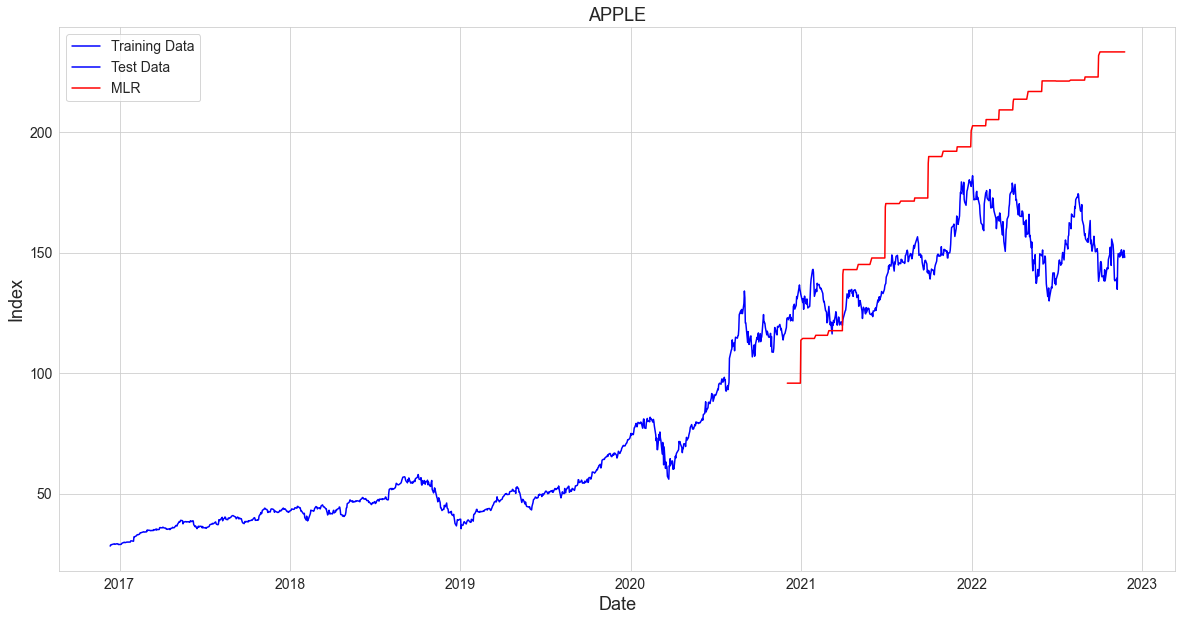

In [35]:
plt.figure(figsize=(20,10))

plt.plot(apple_train.Date[-1000:], 
         apple_train.Close[-1000:],
         'b',
         label="Training Data")

plt.plot(apple_test.Date[:], 
         apple_test.Close[:],
         'b',
         label="Test Data")

plt.plot(apple_test.Date[:], 
         pred[:],
         'r',
         label="MLR")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title('APPLE', fontsize=18)


plt.xlabel("Date", fontsize=18)
plt.ylabel("Index", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

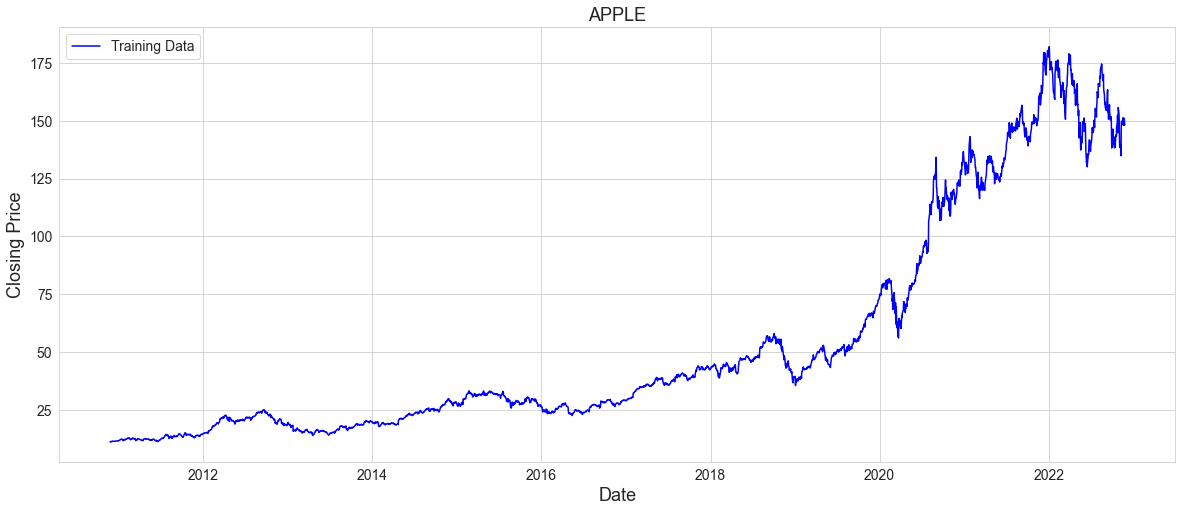

In [30]:
plt.figure(figsize=(20,8))

plt.plot(apple_raw.Date[:], 
         apple_raw.Close[:],
         'b',
         label="Training Data")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title('APPLE', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

In [20]:
apple_macro_train = apple_macro.iloc[:-500].copy()
apple_macro_test = apple_macro.iloc[-500:].copy()

In [21]:
[apple_macro_train.shape, apple_macro_test.shape, len(apple_macro)]

[(2521, 8), (500, 8), 3021]

In [22]:
apple_macro_train

,Date,Close,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
0,2010-11-26,11.250000,2.87,0.28,0.20,15309.471,2.708857,219.590
1,2010-11-29,11.316786,2.84,0.28,0.20,15309.471,2.708857,219.590
2,2010-11-30,11.112500,2.81,0.27,0.20,15309.471,2.708857,219.590
3,2010-12-01,11.300000,2.97,0.28,0.20,15309.471,2.708857,220.472
4,2010-12-02,11.362500,3.01,0.29,0.19,15309.471,2.708857,220.472
...,...,...,...,...,...,...,...,...
2516,2020-11-24,115.169998,0.88,0.11,0.08,21704.706,-3.404590,260.721
2517,2020-11-25,116.029999,0.88,0.11,0.08,21704.706,-3.404590,260.721
2518,2020-11-27,116.589996,0.84,0.11,0.08,21704.706,-3.404590,260.721
2519,2020-11-30,119.050003,0.84,0.11,0.09,21704.706,-3.404590,260.721


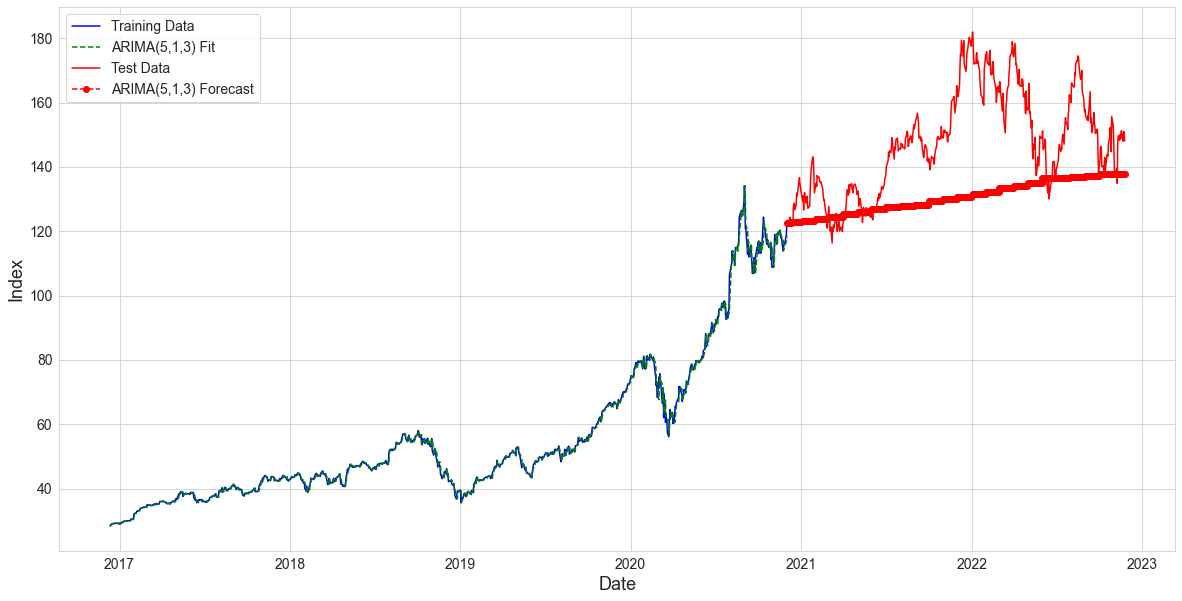

In [33]:
plt.figure(figsize=(20,10))


plt.plot(apple_macro_train.Date[-1000:], 
         apple_macro_train.Close[-1000:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(apple_macro_train.Date[-1000:], 
         apple_macro_arima_dyn.fittedvalues[-1000:],
         'g--',
         label="ARIMA(5,1,3) Fit")

plt.plot(apple_macro_test.Date[:],
         apple_macro_test.Close[:],
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(apple_macro_test.Date[:], 
         apple_macro_arima_dyn.forecast(len(apple_macro_test), 
                                        exog = apple_macro_test[['GDP','CPI','tnote','tbill']][:]),
         'r--o',
         label="ARIMA(5,1,3) Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Index", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

In [34]:
apple_macro_arima_dyn.forecast(len(apple_macro_test), 
                                        exog = apple_macro_test[['GDP','CPI','tnote','tbill']][:])

2521    122.541819
2522    122.458115
2523    122.589309
2524    122.454429
2525    122.851951
           ...    
3016    137.668517
3017    137.668517
3018    137.668517
3019    137.668517
3020    137.668517
Name: predicted_mean, Length: 500, dtype: float64

In [35]:
apple_macro_arima_dyn.predict(len(apple_macro_test))

500      20.013690
501      20.112340
502      20.241058
503      21.142143
504      20.835577
           ...    
2516    114.054835
2517    115.003188
2518    115.887209
2519    116.710967
2520    118.738094
Name: predicted_mean, Length: 2021, dtype: float64

In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [36]:
mape_macro_arima_dyn = mean_absolute_percentage_error(apple_macro_train[['Close']].values, 
                                                      apple_macro_arima_dyn.predict(len(apple_macro_test))
                                                     )
mape_macro_arima_dyn

0.865313674255016